In [53]:
!pip install keras numpy matplotlib glob2


In [54]:
#Import the required packages/dependencies
from keras.layers import Lambda, Dense, Input, Dense, Flatten, Conv2D
from keras.models import Model, load_model
from keras.models import Sequential
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [55]:
#Load the data set and resize images
IMAGE_SIZE = [224, 224]
train_path  ="/content/drive/My Drive/Dataset/Train"
valid_path  ="/content/drive/My Drive/Dataset/Test"

In [56]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [57]:
#vgg19.summary()

In [58]:
#don't train the existing weights
for layer in vgg19.layers:
  layer.trainable = False

In [59]:
#useful for getting number of output classes
folders =  glob("/content/drive/My Drive/Dataset/Train/*")
folders

['/content/drive/My Drive/Dataset/Train/Parasite',
 '/content/drive/My Drive/Dataset/Train/Uninfected']

In [60]:
#our layers
x = Flatten()(vgg19.output)

In [61]:
prediction = Dense(len(folders), activation='softmax')(x)

#Create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [62]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [63]:
#telling the model what cost and optimization method to use
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [64]:
#using the ImageDataGenerator to import the images from the dataset
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
    )

test_datagen = ImageDataGenerator(rescale = 1./255)


In [65]:
training_set = train_datagen.flow_from_directory(train_path, 
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical'
                                                 )

Found 416 images belonging to 2 classes.


In [66]:
training_set

In [67]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [68]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
13/13 [==============================] - 6s 496ms/step - loss: 0.8955 - accuracy: 0.6106 - val_loss: 0.7527 - val_accuracy: 0.4925
Epoch 2/10
13/13 [==============================] - 6s 428ms/step - loss: 0.4552 - accuracy: 0.7500 - val_loss: 0.4341 - val_accuracy: 0.7463
Epoch 3/10
13/13 [==============================] - 6s 428ms/step - loss: 0.3708 - accuracy: 0.8173 - val_loss: 0.3665 - val_accuracy: 0.6866
Epoch 4/10
13/13 [==============================] - 6s 425ms/step - loss: 0.2947 - accuracy: 0.8894 - val_loss: 0.4411 - val_accuracy: 0.8358
Epoch 5/10
13/13 [==============================] - 6s 430ms/step - loss: 0.2863 - accuracy: 0.8846 - val_loss: 0.3825 - val_accuracy: 0.7836
Epoch 6/10
13/13 [==============================] - 6s 428ms/step - loss: 0.2422 - accuracy: 0.9111 - val_loss: 0.9816 - val_accuracy: 0.7388
Epoch 7/10
13/13 [==============================] - 6s 430ms/step - loss: 0.2013 - accuracy: 0.9303 - val_loss: 0.5905 - val_accuracy: 0.8358
Epoch 

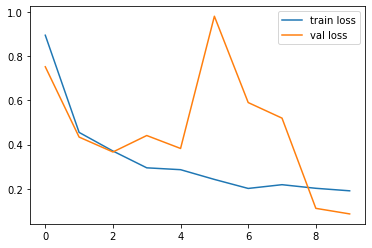

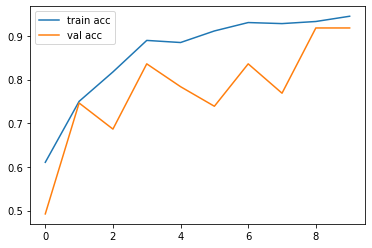

<Figure size 432x288 with 0 Axes>

In [69]:
# plotting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [70]:
# save it as a h5 file
# model.save('model_vgg19.h5')
!mkdir -p saved_model
model.save('saved_model/model_vgg19.h5') 

In [71]:
#Predicting the test dataset
y_pred = model.predict(test_set)
y_pred

array([[9.98900414e-01, 1.09951315e-03],
       [9.47733283e-01, 5.22667728e-02],
       [9.99199092e-01, 8.00958194e-04],
       [1.48943469e-01, 8.51056516e-01],
       [4.05027978e-02, 9.59497213e-01],
       [6.10394239e-01, 3.89605790e-01],
       [6.83908165e-01, 3.16091806e-01],
       [8.63905847e-01, 1.36094138e-01],
       [9.77151692e-01, 2.28482615e-02],
       [9.65994120e-01, 3.40058208e-02],
       [6.84836268e-01, 3.15163732e-01],
       [1.82344824e-01, 8.17655146e-01],
       [9.03069198e-01, 9.69308317e-02],
       [2.17900932e-01, 7.82099068e-01],
       [7.37716615e-01, 2.62283385e-01],
       [4.31732088e-01, 5.68267882e-01],
       [9.63568628e-01, 3.64313535e-02],
       [1.56787470e-01, 8.43212545e-01],
       [6.76778316e-01, 3.23221684e-01],
       [4.51740086e-01, 5.48259914e-01],
       [8.92479837e-01, 1.07520126e-01],
       [4.81314927e-01, 5.18685043e-01],
       [8.78733575e-01, 1.21266410e-01],
       [9.48585123e-02, 9.05141532e-01],
       [7.886905

In [72]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0])

In [73]:
model=load_model('/content/saved_model/model_vgg19.h5')

In [74]:
#Loading a particular image from the test data set
img=image.load_img('/content/drive/My Drive/Dataset/Test/Uninfected/2.png',target_size=(224,224))

In [75]:
#COnvetting it into an array
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [76]:
x.shape

(224, 224, 3)

In [77]:
x=x/255

In [78]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [79]:
#Predicting the particular image
pred = model.predict(img_data)
pred

array([[1.7761570e-04, 9.9982244e-01]], dtype=float32)

In [80]:
a=np.argmax(pred, axis=1)

if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
